# Google Cloud Speech API: Qwik Start

GSP119

https://www.cloudskillsboost.google/focuses/588?parent=catalog&qlcampaign=1p-EDUCR-SG-2021-MAJULAHGCP-2-25

### Overview
The Google Cloud Speech API enables easy integration of Google speech recognition technologies into developer applications. The Speech API allows you to send audio and receive a text transcription from the service (see [What is the Google Cloud Speech API?](https://cloud.google.com/speech/docs/) for more information).

What you'll do
- Create an API key
- Create a Speech API request
- Call the Speech API request

# Create an API Key
Since you'll be using `curl` to send a request to the Speech API, you'll need to generate an API key to pass in our request URL.

To create an API key, click `Navigation menu` > `APIs & services` > `Credentials`. Then click `Create credentials`. In the drop down menu, select `API key`.



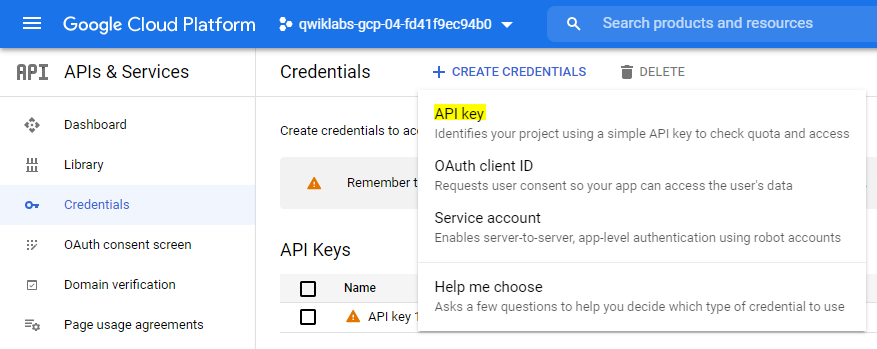

Copy the key you just generated and click `Close`.

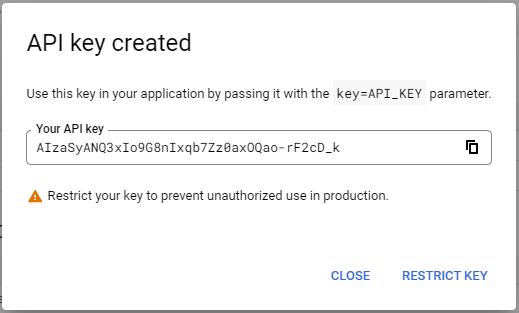

Now that you have an API key, you will save it as an environment variable to avoid having to insert the value of your API key in each request.

In order to perform next steps please connect to the instance provisioned for you via ssh. Open the `Navigation` menu and select `Compute Engine`. You should see the following provisioned linux instance. Click on the `SSH` button. You will be brought to an interactive shell. 


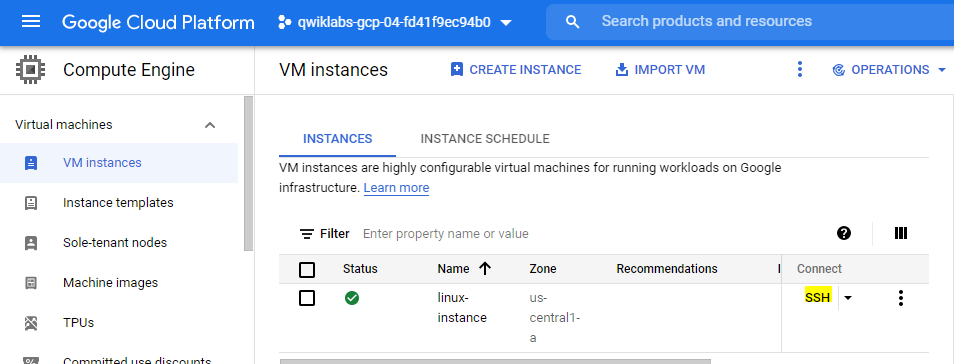

In the command line, enter in the following, replacing `<YOUR_API_KEY>` with the key you just copied:

In [ ]:
export API_KEY=<YOUR_API_KEY>

# Create your Speech API request

Note: You will use a pre-recorded file that's available on Cloud Storage: gs://cloud-samples-tests/speech/brooklyn.flac. You can listen to this file before sending it to the Speech API [here](https://storage.cloud.google.com/cloud-samples-tests/speech/brooklyn.flac).

Create `request.json` in SSH command line. You'll use this to build your request to the speech API.

In [ ]:
touch request.json

Now open the `request.json` using your preferred command line editor (`nano`, `vim`, `emacs`) or `gcloud`. 

In [ ]:
nano request.json

Add the following to your `request.json` file, using the uri value of the sample raw audio file.

In [ ]:
{
  "config": {
      "encoding":"FLAC",
      "languageCode": "en-US"
  },
  "audio": {
      "uri":"gs://cloud-samples-tests/speech/brooklyn.flac"
  }
}

To exit `nano` you can press `Ctrl + O` to write the file, pres `Enter`, then `Ctrl + X` to exit.

The request body has a `config` and `audio` object.

In `config`, you tell the Speech API how to process the request:

- The `encoding` parameter tells the API which type of audio encoding you're using while the file is being sent to the API. `FLAC` is the encoding type for .raw files (here is [documentation](https://cloud.google.com/speech/reference/rest/v1/RecognitionConfig) for encoding types for more details).

There are other parameters you can add to your `config` object, but `encoding` is the only required one.

In the `audio` object, you pass the API the uri of the audio file in Cloud Storage.

Now you're ready to call the Speech API!

# Call the Speech API

Pass your request body, along with the API key environment variable, to the Speech API with the following `curl` command (all in one single command line):

In [ ]:
curl -s -X POST -H "Content-Type: application/json" --data-binary @request.json \
"https://speech.googleapis.com/v1/speech:recognize?key=${API_KEY}"

The response should look something like this:

In [ ]:
{
  "results": [
    {
      "alternatives": [
        {
          "transcript": "how old is the Brooklyn Bridge",
          "confidence": 0.98267895
        }
      ]
    }
  ]
}

The `transcript` value will return the Speech API's text transcription of your audio file, and the `confidence` value indicates how sure the API is that it has accurately transcribed your audio.

You'll notice that you called the `syncrecognize` method in the request above. The Speech API supports both synchronous and asynchronous speech to text transcription. In this example you sent it a complete audio file, but you can also use the `syncrecognize` method to perform streaming speech to text transcription while the user is still speaking.

You created an Speech API request then called the Speech API. 

Run the following command to save the response in a `result.json` file:

In [ ]:
curl -s -X POST -H "Content-Type: application/json" --data-binary @request.json \
"https://speech.googleapis.com/v1/speech:recognize?key=${API_KEY}" > result.json

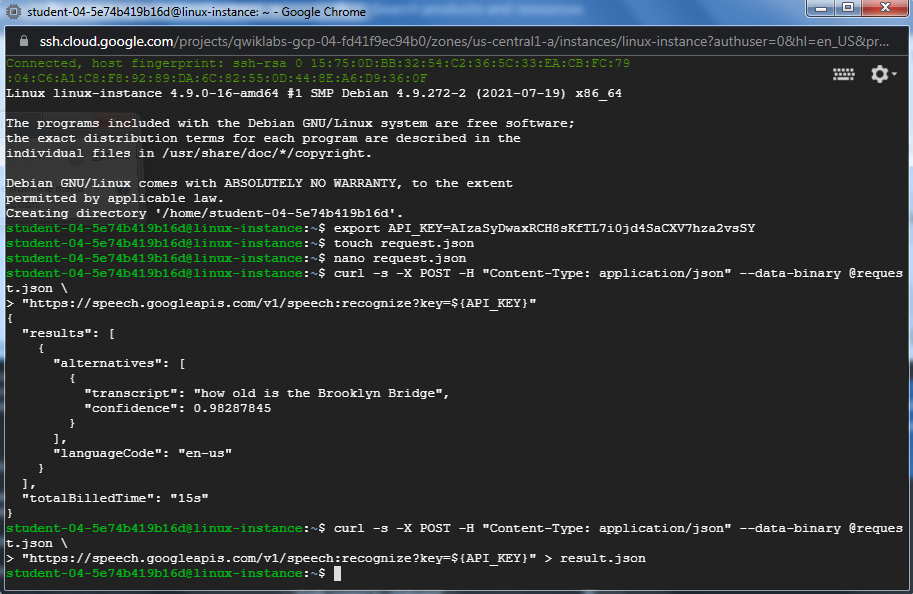

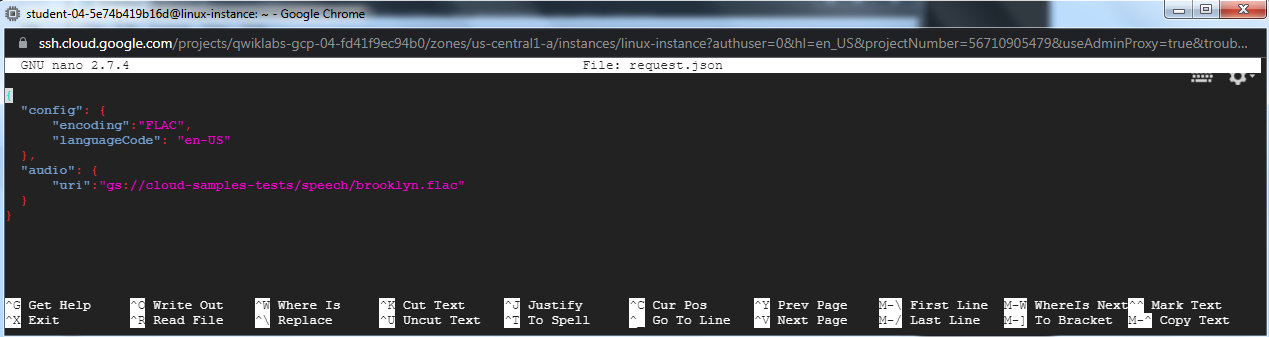